# Vapor-compression refrigeration cycle

##  coolprop
 
CoolProp is a thermophysical property database and wrappers for a selection of programming environments. 

It offers similar functionality to **REFPROP**, but CoolProp is open-source and free.

It was originally developed by Ian Bell, at the time a post-doc at the University of Liege, in Liege, Belgium.

* http://www.coolprop.org/

* https://github.com/CoolProp/CoolProp

### Python Wrapper

```
python -m pip install coolprop
```

#### PropsSI function

For many users, all that is needed is a simple call to the **PropsSI** function for pure fluids, pseudo-pure fluids and mixtures. For humid air properties, see Humid air properties


#### Table of string inputs to PropsSI function

* http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table

| Parameter | Units   | Description|
| ---- |:------:| -----------:|
| P   | Pa	  | Pressure     |
| T   | K    | 	Temp       |
| Q   |mol/mol|	Mass vapor quality |
| H   |J/kg   |	Enthalpy      | 
| S   |J/kg.k |	Entropy       |
| D   |kg/m^3 | Mass density    |


#### The examples using PropsSI

In [1]:
import CoolProp
CoolProp.CoolProp.PropsSI('P', 'T', 273.15+0, 'Q', 1, 'R134a')

292803.18233949516

In this example, 

* **The First parameter**, T, is **the output property** that will be returned from PropsSI.

* **The second and fourth parameters** are the specified **input pair of properties** that determine the state point where the output property will be calculated.

The output property and input pair properties are **text strings and must be quoted.** 

* The **third and fifth parameters** are the **values** of the **input pair properties** and will determine the state point

* The **sixth and last parameter** is the fluid for which the output property will be calculated; also **a quoted string**.




In [2]:
CoolProp.CoolProp.PropsSI('H', 'T', 273.15+0, 'Q', 0, 'R134a')

199999.98852614488

In [3]:
CoolProp.CoolProp.PropsSI('S', 'T', 273.15+0, 'Q', 0, 'R134a')

1000.0000369551423

In [6]:
import CoolProp.CoolProp as cp
pc=cp.PropsSI("R134a", "Pcrit") #  Critical Pressure [Pa]
Tc=cp.PropsSI("R134a", "Tcrit") #  Critical point temperature [K]
print(pc)
print(Tc)

4059280.0
374.21


## 2 Vapor-Compression RefrigerationCycle

* https://www.cpp.edu/~tknguyen/che302/home.htm

  * https://www.cpp.edu/~tknguyen/che302/Notes/chap7-1.pdf

The most common refrigeration cycle is **the vapor-compression refrigeration cycle(VCR)** shown

![](./img/vcr/ivcr-ts.jpg)


* step 1 -> 2, **Isentropic compression**: saturated vapor at $P_L$ is compress isentropically to $P_H$ where it becomes superheated vapor.

* step 2 -> 3, **Isobaric heat rejection**:  heat $Q_H$ is transferred to the surrounding by condensation at $T_H$. 

* step 3 -> 4, **Isenthalpic expansion**: the cycle is closed by throttling the liquid to the lower pressure $P_L$

* step 4 -> 1, **Isobaric heat addition**: heat is removed at the temperature $T_L$ from the system being refrigerated by the evaporation of a liquid under the pressure $P_L$

### An ideal vapor-compression refrigeration cycle

* https://www.cpp.edu/~tknguyen/che302/home.htm

  * https://www.cpp.edu/~tknguyen/che302/Notes/chap7-2.pdf

Refrigerant 134a is the working fluid in an ideal vapor-compression refrigeration cycle that
communicates thermally with a cold region at 0°C and a warm region at 26°C. 

Saturated vapor enters the compressor at 0°C and saturated liquid leaves the condenser at 26°C.

The mass flow rate of the refrigerant is 0.08 kg/s.

**Determine** 

* (a) the compressor power, in kW,

* (b) the refrigeration capacity, in tons, 

* (c) the coefficient of performance 

![](./img/vcr/ivcr-example723.jpg)

### Refrigeration Cycle Analysis

![](./img/vcr/ivcr-analysis.jpg)

(a) The compressor work is give by

$\dot{W}_{c}=\dot{m}*(h_2-h_1)$

(b) The refrigeration capacity, in tons, is

$\dot{Q}_{in}=\dot{m}*(h_1-h_4)*(60s/min)\frac{1ton}{211 kJ/min}$


(c) The coefficient of performance is

$COP_c=\frac{\dot{Q}_{in}}{\dot{W}_{c}}=\frac{h_1-h_4}{h_2-h_1}$


### Python Code

**expressions to code directly**

In [1]:
import CoolProp.CoolProp as cp
mdot=0.08
t1=0
t3=26;

p1=cp.PropsSI('P', 'T', 273.15+t1, 'Q', 1, 'R134a')/1.0e6;
h1=cp.PropsSI('H', 'T', 273.15+t1, 'Q', 1, 'R134a')/1000;
s1=cp.PropsSI('S', 'T', 273.15+t1, 'Q', 1, 'R134a')/1000;

p3=cp.PropsSI('P', 'T', 273.15+t3, 'Q', 0, 'R134a')/1.0e6;
h3=cp.PropsSI('H', 'T', 273.15+t3, 'Q', 0, 'R134a')/1000;

p2=p3;
s2=s1;
h2=cp.PropsSI('H', 'P',p2*1.0e6, 'S',s2*1000, 'R134a')/1000;

h4=h3;

# The compressor work is give by
wc=mdot*(h2-h1);
# The refrigeration capacity in tons
qin=mdot*(h1-h4)*60*(1/211);
# The coefficient of performance is
cop=(h1-h4)/(h2-h1);

print("The compressor work(kW): {:.2f}".format(wc))
print("The refrigeration capacity(tons): {:.2f}".format(qin))
print("The coefficient of performance: {:.2f}".format(cop))



The compressor work(kW): 1.41
The refrigeration capacity(tons): 3.70
The coefficient of performance: 9.24


### T-s Diagram

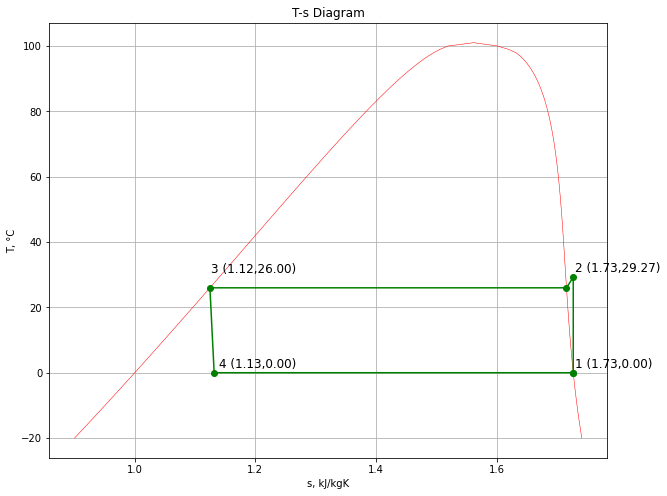

In [2]:
"""
T-s Diagram
"""
import CoolProp.CoolProp as cp

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10.0, 8.0))  # figsize :set figure size
plt.title("T-s Diagram")
plt.xlabel("s, kJ/kgK")
plt.ylabel("T, °C")
plt.grid()

Tc=cp.PropsSI("R134a", "Tcrit") #  Critical point temperature [K]
tc = Tc-273.15
T = np.linspace(-20, tc,120)
for x in np.array([0, 1.0]):
    S=np.array([cp.PropsSI('S', 'T', 273.15+t, 'Q', x, 'R134a')/1000 for t in T])
    plt.plot(S, T, 'r', lw=0.5)

# cycle
t2= cp.PropsSI('T', 'P',p2*1.0e6, 'S',s2*1000, 'R134a')-273.15
s3=cp.PropsSI('S', 'P',p2*1.0e6, 'Q',0, 'R134a')/1000
t4=t1
p4=p1
s4=cp.PropsSI('S', 'P',p4*1.0e6, 'H',h4*1000, 'R134a')/1000
ta=t3
sa=cp.PropsSI('S', 'T',ta+273.15, 'Q',1, 'R134a')/1000

t=[t1,t2,ta,t3,t4,t1]
s=[s1,s2,sa,s3,s4,s1]
plt.plot(s,t, 'g-o', lw=1.5)

plt.annotate('1 ({:.2f},{:.2f})'.format(s[0], t[0]),
                 xy=(s[0], t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s[1], t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s[3], t[3]),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+1, +15), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s[4], t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(+5, +5), textcoords='offset points', fontsize=12)

plt.show()